# EDSA Apple Prices Challenge

### Summary 

The prediction of the price of fresh produce, like Golden Delicious Apples, is beneficial to those who face the issues of buying stock of such produce as well as deciding how to price that stock for sale. In this notebook we attempt to display our process of EDA and model building using data pertaining to Golden Delicious apples, in order to accurately predict the average price per kg that these apples should be sold at given the difference facets of apple sales. Our EDA found it beneficial to include all numerical features in model training as well as the categorical feature describing the quality of the apples. The Date feature was also engineering to reflect monthly/seasonal changes in the price of apples and also included in the model. Here seven different models were tested, to find the solution to the apple price problem. Of the seven the Random Forest proved to be the better model for the data as it gave the best RMSE and R^2 scores with less overfitting by the model to the training data.

### 1. Introduction

In the business of buying and selling fresh produce, problems that may be encountered include being uncertain of how much stock to buy without excessive wastage and what prices that stock should be sold at, given the it's quality as well as the demand for the produce. Furthermore, with fresh produce being available on a seasonal basis, stock and prices tend to fluctuate. 

By using variables associated with the sale of fresh produce and incorporating seasonal fluctuations, the prices of these products can be closely predicted. This can provide an essential service to those budgeting on how much stock to purchase and what to price to sell it at.

In this Apple Prices challenge, we aim to accurately predict the average price per kg of Golden Delicious apples by building abd testing regression models using several, differeny advanced regression algorithms and techniques. This notebook details the workflow of team JM1 in desiging and implenting a regression model and solution to the "apple price" problem.

### 2. Loading and Exploratory Data Analysis (EDA)

#### 2.1. Necessary Packages
To carry out EDA, model building and assessment of model performance

In [3]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
import datetime as dt

# Model selection
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from statsmodels.graphics.correlation import plot_corr

# General
import pandas as pd
import numpy as np
import pickle

#### 2.2. Training and Testing datasets

In [39]:
# loading and reading train.csv to a Dataframe.
train_csv = pd.read_csv('df-train_set.csv')
train_df = pd.DataFrame(train_csv)

In [40]:
# overview of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [41]:
# loading and reading test csv to Dataframe. Removal of index column from main dataframe and creation of id variable.
test_csv = pd.read_csv('df-test_set.csv')
test_df = pd.DataFrame(test_csv)
test_id = test_df['Index']
test = test_df.drop('Index', axis=1)

In [42]:
# overview of train dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        685 non-null    object 
 1   Container       685 non-null    object 
 2   Size_Grade      685 non-null    object 
 3   Weight_Kg       685 non-null    float64
 4   Commodities     685 non-null    object 
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 64.3+ KB


The data for this competition is provided in two files: df-train_set.csv and df-test_set.csv. The training set has 64376 rows and 13 columns while the testing set has 685 rows and 12 columns. Each row represents one observation and each column is a feature, describing several elements of apple stocks and prices. The overview of each of the dataset indicates the datatypes of each of the columns. The train_df is seen to have six columns are float datatypes , two integer datatypes and five object datatypes, that are likely nominal/ordinal variables. The test dataframe is oberved to contain five, two and five float, integer and object datatypes, repectively. 

#### Columns:

Province - Which province the produce was grown

Container - The code for the type of container

Size_Grade - The class of the produce according to their quality

Weight_Kg - The total weight in kilograms

Commodities - The type of produce, e.g. Golden Delicious Apples

Date - The date of the sale

Low Price - Lowest price produce is sold at

High Price - Highest price produce is sold at

Sales_Total - The total sales price

Total_Qty_Sold - The number of produce sold

Total_Kg_Sold - The total weight of the produce sold in kilograms

Stock_On_Hand - The amount of produce the store has

The training set has one additional column, 'avg_price_per_kg', which represents the average price per kg of apples as well as response variable that is to be predicted.

The testing dataset contains the unseen data that our trained model will be exposed to. This will be used to predict the average price per kg of Golden Delicious apples and determine how accurately our model has been trained.
The index column of the test dataset is filtered out as the train_id and dropped from the "main" dataset. This provides the necessary id numbers as a separate variable that will later be used to create a submission cvs, consisting of the id's and their respective 'avg_price_per_kg', predicted by the model.

In [43]:
# displaying the train Dataframe
train_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [44]:
# displaying the test Dataframe
test_df.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


From the above display of the train_df it can be seen that there are several different commodities in addition to Golden Delicious apples that also make up this dataset. Filtering for the product in question is therefore necessary to ensure the data set we move forward with, contains only data pertaining to Golden Delicious apples. The overview output below shows the decrease in observation number from 64376 to 1952.

In [45]:
# filtering train dataframe for rows where Commoditites == 'APPLE GOLDEN DELICIOUS'. See decrease in total number of rows
train = train_df[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


#### 2. 3. Statistical and Visual EDA  
Now that the dataframes have been loaded and filtered specifically for 'Golden Delicious' apples, we can carry out some specific EDA on some of the variables of the dataset. Interesting anomalies, trends, correlations, or patterns of the data will be looked at quantitatively and visually, in order to determine how they can be used for feature engineering and modeling training.

#### 2.3.1. The distribution of the response

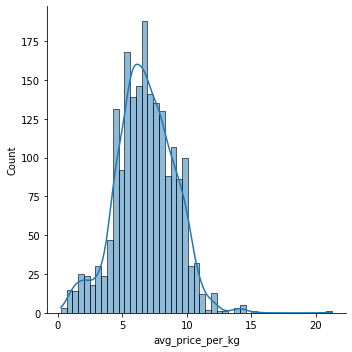

In [9]:
# visualising the 'avg_price_per_kg' distribution
sns.displot(train.avg_price_per_kg, kde=True)
plt.show()

In [10]:
# statistical summary of avg_price_per_kg
train.avg_price_per_kg.describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

Understanding the distribution of the response variable can provide insight into how popular certain price points are compared to others and provides the range of more common observations in the dataset. Here the avg_price_per_kg of Golden Delicious apples displays a fairly normal distribution with a few more observations for lower price apples than higher priced apples. This makes logical sense as cheaper apples may be more appealing to buyers. 

The distriubtion has some peakedness, between the R5 and R10 price points suggesting that majority of Golden Delicious apples are likely sold within this price range and there are more purchases of apples occur if they fall within this price range. This distribution can also provide additional insight into the ranges of average prices to expect from our model's predictions. 

The statistical insight into the response variable summarizes its distribution qualities indicating an average price range from R0.25 to R21.24, with R21.24 in price being an obvious outlier among the prices in the dataset. Furthermore, the price points measured at quartile 1 (25% == R5.46) and and quartile 3 (75% == R8.28) again indicate that the majority of apples are indeed priced between R5 and R10.

#### 2.3.2. Relationship between numerical predictors  and the response
This portion of EDA details the distribution and statistical summaries of each of the numerical (float and integer datatypes) features of the train dataset as well as investigates the relationship between each predictor and the response. This will provide insight into which of these predictors are most suitable to include in feature selection and model training. 

Numerical predictors;
- Weight_Kg
- Low_Price
- High_Price
- Sales_Total
- Total_Qty_Sold
- Total_Kg_Sold
- Total_Stock_On_Hand

**Distribution and statistical summary of numerical predictors**

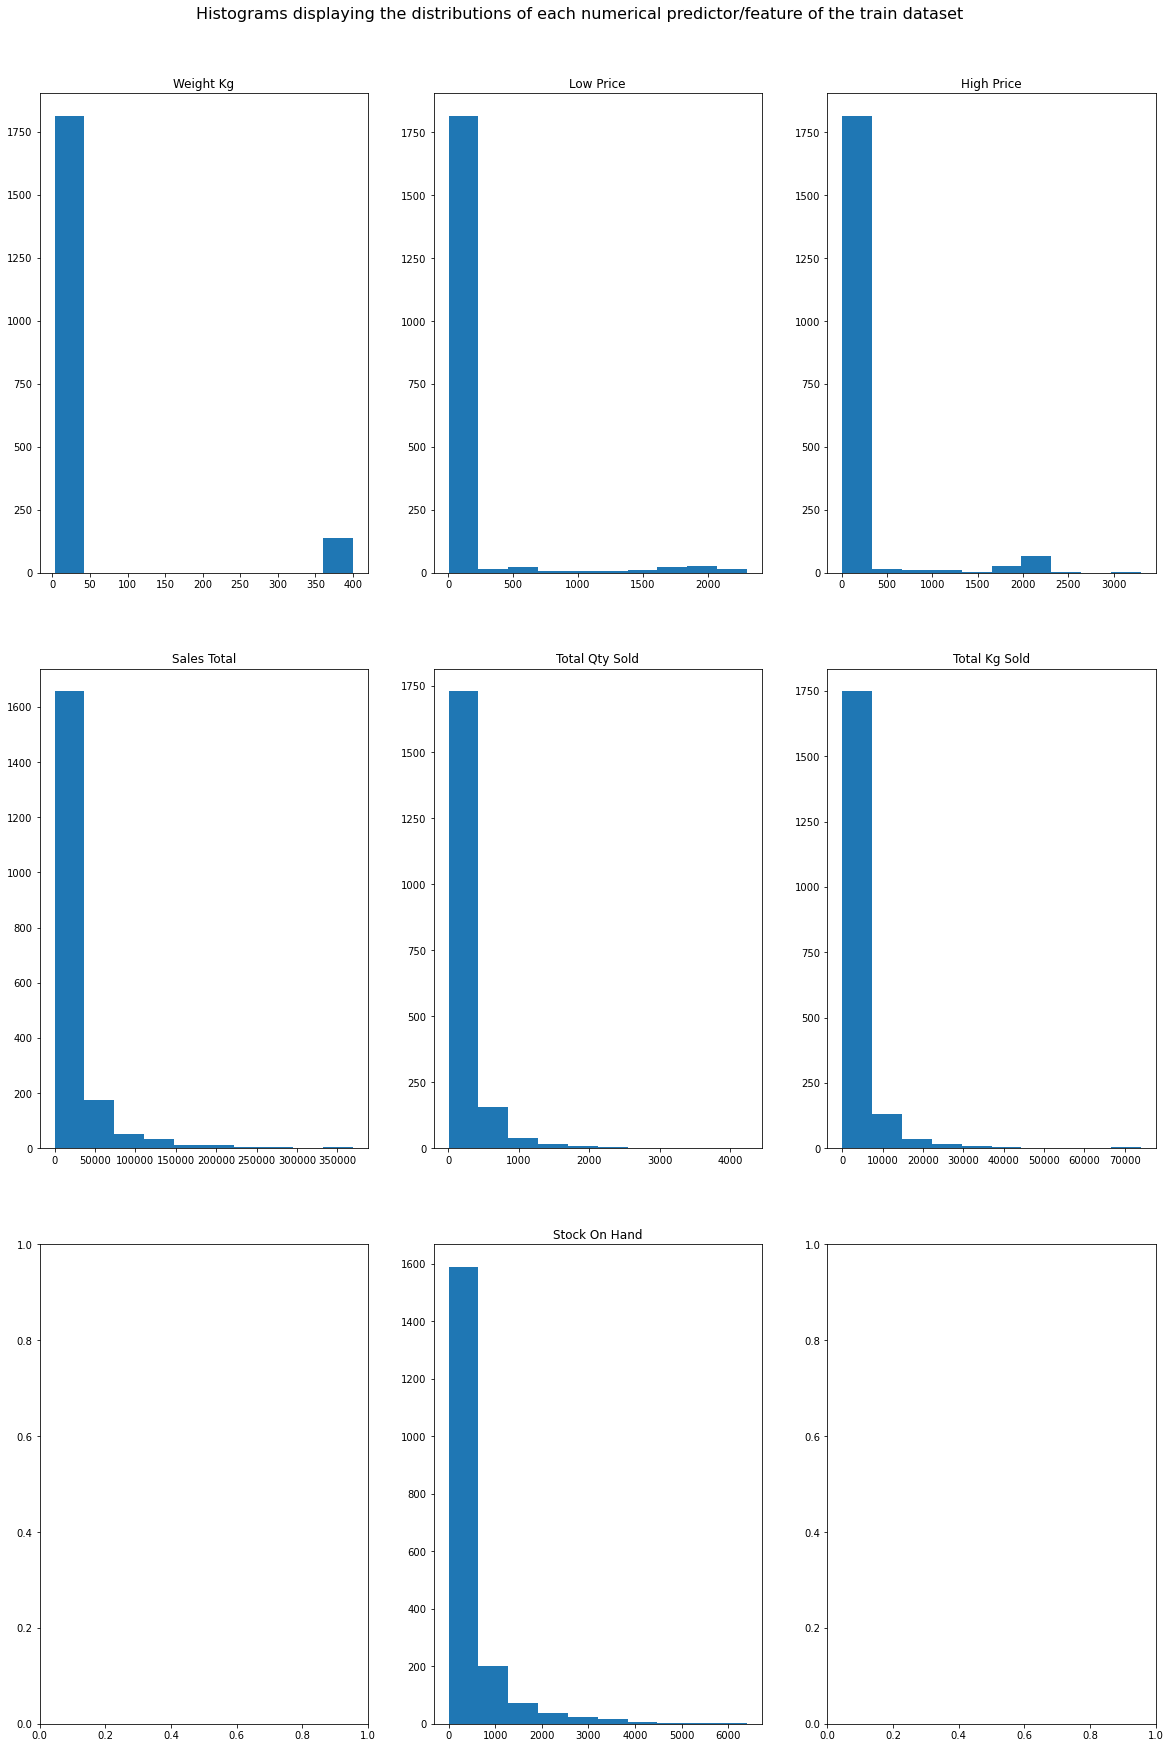

In [11]:
# checking distribution of each numerical predictor
fig, ax = plt.subplots(3,3, figsize=(20,30))

ax[0, 0].hist(train['Weight_Kg'])
ax[0, 0].set_title('Weight Kg')

ax[0, 1].hist(train['Low_Price'])
ax[0, 1].set_title('Low Price')

ax[0, 2].hist(train['High_Price'])
ax[0, 2].set_title('High Price')

ax[1, 0].hist(train['Sales_Total'])
ax[1, 0].set_title('Sales Total')

ax[1, 1].hist(train['Total_Qty_Sold'])
ax[1, 1].set_title('Total Qty Sold')

ax[1, 2].hist(train['Total_Kg_Sold'])
ax[1, 2].set_title('Total Kg Sold')

ax[2, 1].hist(train['Stock_On_Hand'])
ax[2, 1].set_title('Stock On Hand')

fig.suptitle('Histograms displaying the distributions of each numerical predictor/feature of the train dataset', y= 0.92, fontsize=16)
plt.show()

In [12]:
# statistical summary of each numerical fearure of the dataset
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


The distribution plots display that the highest frequencies of observations are seen to fall within the lower portion of each of the numerical predictor ranges, with much less observations towards the higher ends of their range. This is further justified by the statistical summary where comparisons between the 3rd quartile (75%) value and the maximum value, for each predictor, sees a significant increase in their respective values. 

With the regards to the Weight_Kg of the apple data, majority of the observations appear to fall within the range of 0kg to around 50kg, with a small number of observations larger than 300kg. The statistical summary of Weight_Kg shows the spread of the amount of apples in kg's, between 25% and 75% of the observations, falls within the range of 9kg to 18kg. Therefore quantities of apples greater than 18kg can indicate circumstances of increased apple supply/stock.

Both the Low Price and High Price variables appear to have the most observations within the R0 to R500 range, with much fewer observations from R500 upwards. The statistical summary displays small differences in the price points at min, 25%, 50%, 75% and max between Low_Price and High_Price, this can be an indication that stock prices do not vary much per kg of apples and increases in both the low and high prices are likely associated with an increase in demand. 

Sales_Total, Total_Qty_Sold, Total_Kg_Sold and Stock_On_Hand appear to be postively skewed, this can be due to it being likely that the selling of very high volumes of apples is scarce as is having very large quatities of apple stock.

**Pairplot and correlation between each numerical predictor and response**

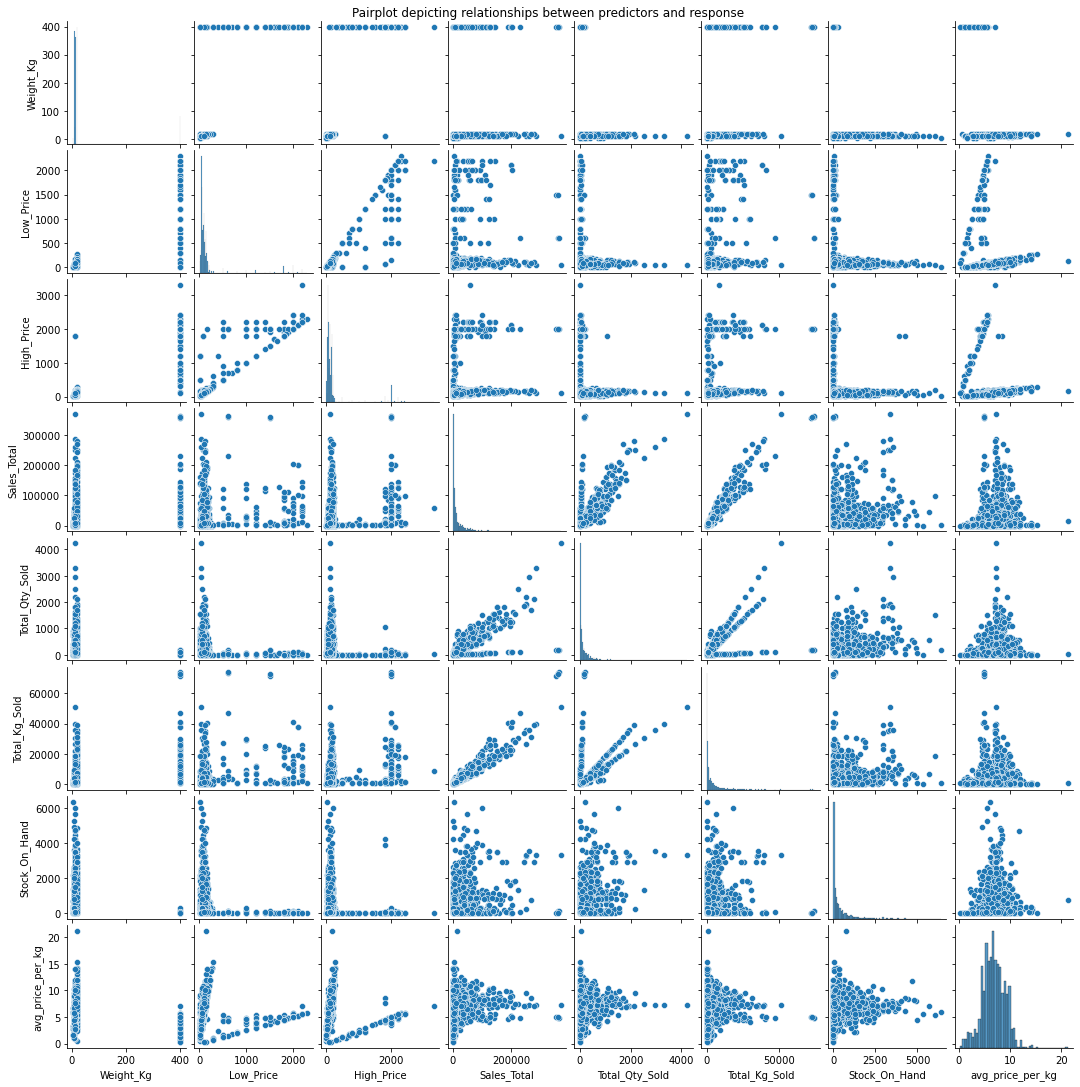

In [13]:
# creates a pair plot to identify relationships between numerical predictors and 'avg_price_per_kg'
g = sns.pairplot(train)
g.fig.suptitle('Pairplot depicting relationships between predictors and response', y = 1)
g.fig.set_size_inches(15,15)

To check for linearity among variables, we used a pairplot plotting the pairwise relationships within the train dataset. None of the numerical predictors appear to share any linearity with the response. This may pose a problem in training linear models in particular, as a lack of linearity indicates that the relationship between the independent variables and the dependent variable is not a direct or very correlated.

Several cases of multicollinearity are observed among Low_Price and High_Price predictors and the Sales_Total, Total_Qty_Sold and Total_Kg_Sold. Multicollinearity poses another problem for model design as becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change togther (changes in one variable are associated with shifts in another variable).

In [14]:
# generating a correlation matrix for the numerical predictors and 'avg_price_per_kg'
train[['Weight_Kg', 'Low_Price', 'High_Price','Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg']].corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


The correlation matrix further indicates the correlation between Low_Price and High_Price (0.938140) and Sales_Total, Total_Qty_Sold and Total_Kg_Sold (0.651440 - 0.962338)  as well as the lack thereof between avg_price_per_kg and all numerical predictors. There is also a strong positive correlation between Weight_Kg, Low_Price and High_Price (0.863182, 0.905852) inferring the relationship of an increase in price point for an increase in weight of apples.

#### 2.3.3. Relationship between categorical predictors and the response
Here the distribution of each of the categorical predictors as well as the relationship between these predictors and the response will be investigated. This will aid in determining which of predictors are suitable for model building.

Categorical predictors;
* Province
* Container
* Size_Grade
* Commodities
* Date

**Distributions of categorical predictors**

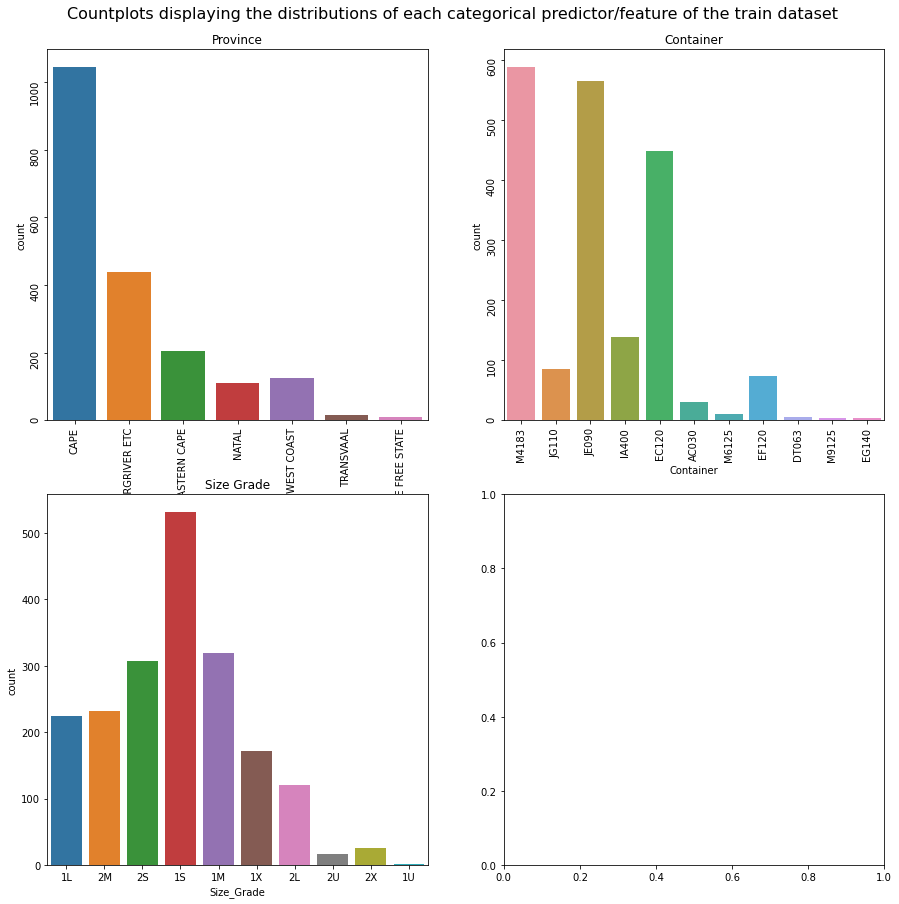

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(ax = ax[0,0], x = train['Province'], data = train)
ax[0, 0].set_title('Province')
ax[0, 0].tick_params(labelrotation=90)

sns.countplot(ax = ax[0,1], x = train['Container'], data = train)
ax[0, 1].set_title('Container')
ax[0, 1].tick_params(labelrotation=90)

sns.countplot(ax = ax[1,0], x = train['Size_Grade'], data = train)
ax[1, 0].set_title('Size Grade')

fig.suptitle('Countplots displaying the distributions of each categorical predictor/feature of the train dataset', y = 0.92, fontsize=16)
plt.show()

Countplots were used to depict the distributions of the categorical variables as it clearly displays the frequencies of each category.

Province displays a somewhat skewed distribution, this may be due to certain provinces growing significantly larger yields of apples compared to other provinces. Among these provinces 'Cape' has the highest frquency in the training dataset.

The Container predictor does not follow a normal distribution and displays 3 containers (M4183, JE090 and EC120) with relatively high frequencies.

Displaying a more normal distribution among all the preditors, is the the Size_Grade of the apples, this predictor describes the quality of the apples. Size_Grade shows a peak around the 1S variety of apples suggesting these as the most popular variety of Golden Delicious apples. 

Date was excluded from this grid as a countplot would not be very accurate representation of its distribution. 

**Scatter plots between categorical features and response**

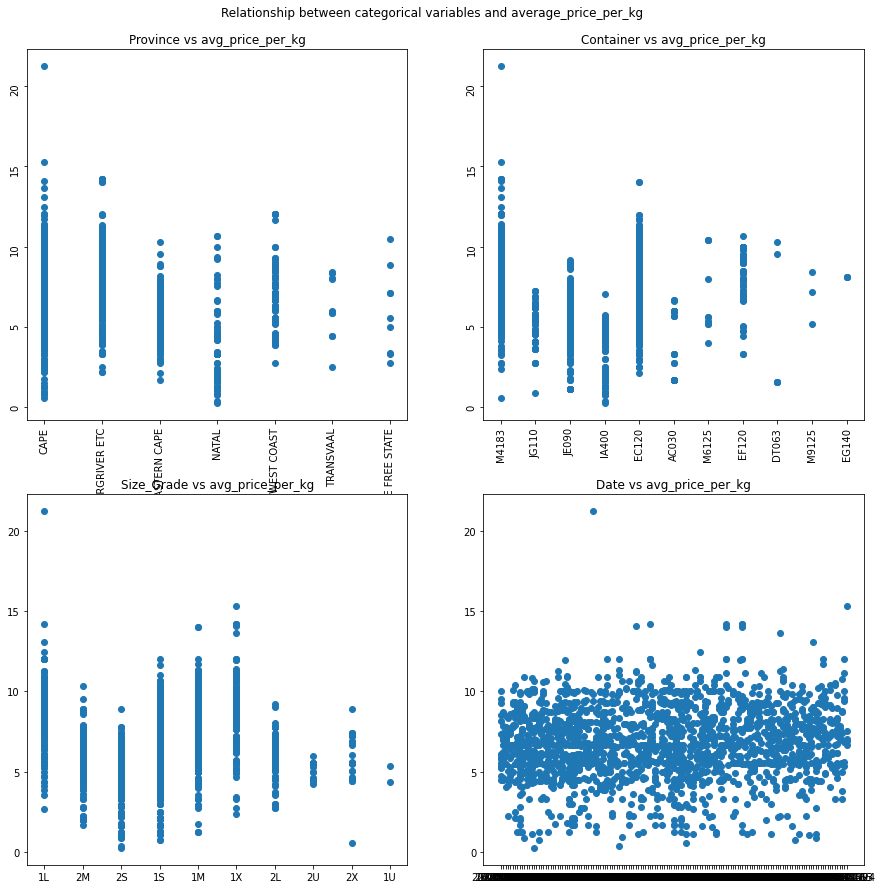

In [16]:
# visuals for relationship between categorical predictors and 'avg_price_per_kg' with scatter plots
fig, ax = plt.subplots(2,2, figsize=(15,15))

ax[0, 0].scatter(train['Province'], train['avg_price_per_kg'])
ax[0, 0].set_title('Province vs avg_price_per_kg')
ax[0, 0].tick_params(labelrotation=90)

ax[0, 1].scatter(train['Container'], train['avg_price_per_kg'])
ax[0, 1].set_title('Container vs avg_price_per_kg')
ax[0, 1].tick_params(labelrotation=90)

ax[1, 0].scatter(train['Size_Grade'], train['avg_price_per_kg'])
ax[1, 0].set_title('Size_Grade vs avg_price_per_kg')

ax[1,1].scatter(train['Date'], train['avg_price_per_kg'])
ax[1,1].set_title('Date vs avg_price_per_kg')

fig.suptitle('Relationship between categorical variables and average_price_per_kg', y = 0.92)
plt.show()

Majority of the average price is observed to fall between R0 and R15 per kg, irrespective of the Province, Container and Size_Grade and Date of each observation. One obvious outlier is present within the data within Cape Province and of Size_Grade 1L (R21.24; see train.avg_price_per_kg.describe()).

With regards to Date feature it is seen that a large concentration of  the observations sit within the R5 to R10 price range, suggesting this price range is typically maintained throughout the year. Much like the other categorical variables and in line with what was previously seen in the distribution of avg_price_per_kg, the general price range of these apples is between R0 and R15. 

Commodities was excluded from the grid of scatter plot visuals, given all are 'Apple Golden Delicious'.

Text(0.5, 0.92, 'Box Plots for the predictors Province, Container and Size_Grade')

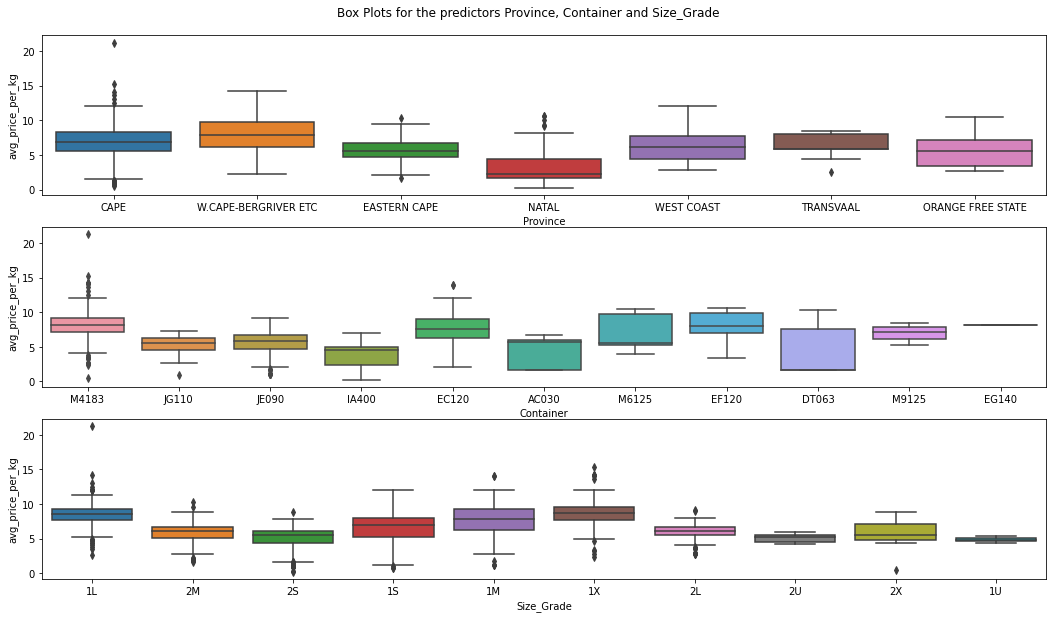

In [17]:
# boxplot visuals displaying the range of apple prices per Province and Size Grade
fig,ax = plt.subplots(figsize=(18,10), nrows=3)
sns.boxplot(data=train, x='Province', y='avg_price_per_kg', ax=ax[0])
sns.boxplot(data=train, x='Container', y='avg_price_per_kg', ax=ax[1])
sns.boxplot(data=train, x='Size_Grade', y='avg_price_per_kg', ax=ax[2])
fig.suptitle('Box Plots for the predictors Province, Container and Size_Grade', y = 0.92)

Boxplots provide a clearer representation of the relationships between the categorical predictors and avg_price_per_kg with more insight into where and how many price outliers are present for each category. Slight differences in the spread of the avg_price_per_kg can be observed in among each of the sub-categories within each feature, with majority spread between R5 and R10. 


Converting Date predictor (initially an object type datatype) to a datetime, allows for different portions of the datetime object to be extracted for analysis. Given that the growing and selling of apples is a seasonal occurence which changes month to month, a logical representation of the relationship between the Date predictor and avg_price_per_kg can involve plotting the change in average price over months.

In [46]:
# converting 'Date' object to datetime and extracting the month portion.
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.month
# sorting train Dataframe by month
train = train.sort_values(by='Date')

<ipython-input-46-fdd5d0609d3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(train['Date'])
<ipython-input-46-fdd5d0609d3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = train['Date'].dt.month


Text(0.5, 0, 'Month')

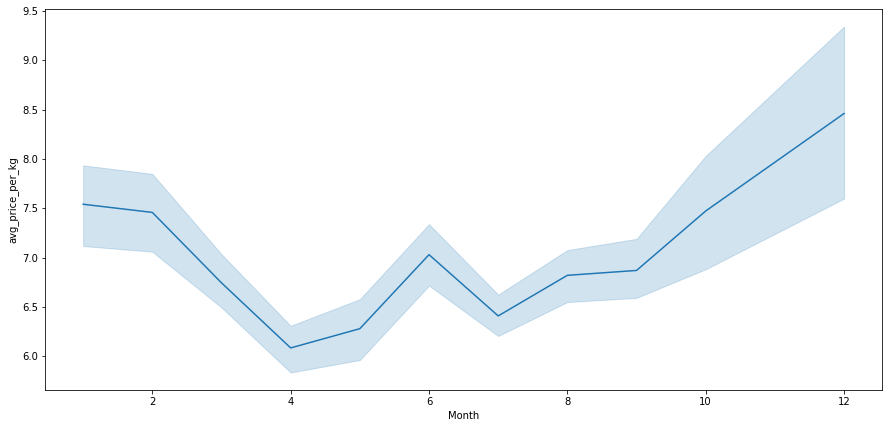

In [19]:
# lineplot visual for change in avg_price_per_kg per Date in months 
fig = plt.subplots(figsize=(15,7))
sns.lineplot(data=train, x='Date', y='avg_price_per_kg')
plt.xlabel('Month')

This lineplot provides clearer insight into the relationship between avg_price_per_kg and the Date feature of the dataset. The fluctuations in avg_price_per_kg over throughout the year is clearly observed in this plot. Golden Delicious apples are considered to be in season during the summer and harvested during February and March (Denneguer Farm). This can suggest that the decrease in price around month 2 (February) is as a result of a high supply of apples. Prices increase again at month 4 (April), possibly as a result of lower stock levels but a higher demand for apples. Another drop in prices around month 6 (June) can relate to a low supply and demand for the apples, given that they may be out of season at this point. A gradual increase in price from month 7 (July) onwards can then be suggestive of lower supply of apples with an increasing demand for them as they come into season. The blue, shaded regions depict the deviations from the average price per kg from each monthly observation in the dataset, however majority of the plot falls within the price range of around just under R6 to just over R9. 

#### 2.3.4.Feature Selection
Given the EDA findings the predictors selected for model training include;

Among categorical predictors;

- Size_Grade being the 'Class of produce according to their quality', as the different apple qualities may account for the slight differences in avg_price_per_kg.  

- The Date also makes a likely addition to the model as the quality and yields of fresh produce is on a seasonally basis.

Numerical predictors;

- Weight_Kg, as the average price is based on the weight of apples.

- Low_Price and High_Price, these features decide the avg_price_per_kg depending on the supply and demand of the apples. 

- Total_Sales, Total_Qty_Sold, Total_Kg_Sold, relates to the demand of the apples and contributes in setting the avg_price_per_kg

- Stock_On_Hand - related to the supply of the apples and also contributes to setting the avg_price_per_kg


### 3. Pre-processing of Training and Testing data
In preparation for our model training, the train dataset is required to undergo pre-processing. The test dataset requires the same pre-processing in order for the model to accurately predict the response value.


#### 3.1. Feature Engineering of Size_Grade and Date

In [47]:
# dictionary of Size_Grades given a corresponding number according to their quality (lower quality  to higher quality)
sizes = {'1S':1, '1M':2, '1L':3, '1X':4, '1U':5, '2S':6, '2M':7, '2L':8, '2X':9, '2U':10}

# training data
for i in train.index:
    train['Size_Grade'][i] = sizes[train['Size_Grade'][i]]

<ipython-input-47-c0facc247760>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Size_Grade'][i] = sizes[train['Size_Grade'][i]]


In [48]:
#test data
#same manipulations are done to the test data
for i in test.index:
    test['Size_Grade'][i] = sizes[test['Size_Grade'][i]]

<ipython-input-48-aaca2ab22698>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Size_Grade'][i] = sizes[test['Size_Grade'][i]]


As Size_Grade is representative of the quality of apples, replacing each size grade class with a number allows for the model to distinguish lower quality and higher quality apples from each other, and could thus increase the model's prediction accuracy.

The same changes made to the Date feature of the train dataset is applied to the Date feature of the test dataset.

In [49]:
# converting 'Date' object to datetime and extracting the month portion.
test['Date'] = pd.to_datetime(test['Date'])
test['Date'] = test['Date'].dt.month

#### 3.2. Data Scaling

In [50]:
# Creating X and y variables to be used in fitting/training and testing/predicting of the model by dropping predictors that are irrelevant to avg_price_per_kg
X = train.drop(['Province', 'Commodities', 'Container','avg_price_per_kg'], axis=1)
y = train['avg_price_per_kg']
X_test = test.drop(['Province', 'Commodities', 'Container'], axis = 1)

In [51]:
scaler = StandardScaler()
# scaling of train variables and creation of Dataframe of all scaled variables
X_scaled = scaler.fit_transform(X.values)
# scaling of test variables
X_scaled_test = scaler.fit_transform(X_test)

Scaling the variables before model is a necessary pre-processing step given the large difference in predictor ranges, particularly among the numerical variables. Here the standard scaler is used to standardisize all selected features by converting each observation into a z score between -1 and 1, thus putting all features within the same range. Standardization in particular helps deal with robust outliers and also aids in generating refined predictions with lower variance.

### 4. Model Building
This section details the building and assesment of seven models as part of the solution to the apple price problem.
* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regression
* Random Forest Regression
* Gradient Boosting Regression
* Adaptive Boosting Regression

**Linear Regressor**

In [16]:
#model 1, Linear Regression
model_1 = LinearRegression()

The simplest form of regression is linear regression, which assumes that the predictors have a linear relationship with the target variable and the input variables are assumed to have a normal distribution and do not display multicollinearity. These models are useful for finding the relationship between continuous variables. Given majority of the predictors of this dataset do not have a normal distribution and with some cases of multicollinearity, it is expected that this model will not be able predict an accurate avg_price_per_kg. 

**Ridge Regressor**

In [52]:
# model 2, Ridge Regression 
model_2 = Ridge()

Ridge regrssion models, regularizes the data and improves effects of multicollinearity and overfitting by penalizing the sum of squared coefficients (L2 penalty), this decreases model complexity while keeping all variables in the model. An improvement in model prediction accuracy is expected from this model, given the added penalty on the loss function. 

**Lasso Regressor**

In [53]:
# model 3, Lasso Regression
model_3 = Lasso()

With lasso regression, the loss function is modified to minimize the complexity of the model by penalizing  the sum of their absolute values (L1 penalty). As a result, for high values of the λ penalty, many coefficients are zeroed, thereby dropping some of the predictors in the model and carrying out further feature selection. 

**Decision Tree Regressor**

In [54]:
# model 4, Decision Tree Regression
model_4 = DecisionTreeRegressor(max_depth=4)

Decision trees maps features to a conclusion about the target response. Each node in the tree acts as a "question" for some feature of the training data, and each split from the node corresponds to possible answers to that "question". This process is recursive in nature and is repeated for every subtree rooted at the new node until the terminal node is reached.
This regression model is typically used for handling non-linear dataset as well as a continuous variables. Given the nonlinearity in predictors vs response in our data and with majority of the predictors being continuous variables, implenting a Decision Tree model is expected to improve the prediction accuracy of avg_price_per_kg 

**Random Forest Regressor**

In [55]:
# model 5, Random Forest Regression
for x in range(10, 110, 10):
    model_5 = RandomForestRegressor(max_depth=5, n_estimators=x)

With Decision Trees being prone to overfitting, the Random forest regressor was considered for our next attempt as it fits the overall properties on the data rather than individual points, and with voting being randomized the results can be considered more refined. Random Forest models use multiple Decision Trees in it's prediction and assigns the value of the response as the average output of each decision tree. The most convenient benefit of using random forest is its default ability to correct for overfitting, which is often experienced by use of single decision trees.

The default parameter values for this model don't always provide best results, therefore tuning these parameters can increase prediction accuracy of the model. The max_depth represents the depth of each tree in the forest, wehere the deeper the tree, the more splits it has so more information is captured about the data. n_estimators sets the number of trees to include in the model, the more trees the better learning of the data by the model.

**Gradient Boosting Regressor**

In [56]:
# model 6, Gradient Boosting Regression
for x in range(10, 110, 10):
    model_6 = GradientBoostingRegressor(n_estimators=x, max_depth=4)

A type of ensemble method of modelling, Gradient Boosting combines several 'weak' models (in this case a decision trees) and takes the aggregate of all individual model predictions to predict a target variable, with all models weighted equally. Gradient boosting fits each subsequent model with the residual errors of the predictions of the preceding model aiming to reduce the overall prediction error and move closer to an accurate prediction of the response.

As gradient boosting tries to correct the prediction errors in each sequential tree, we expect that this model will improve prediction accuracy. 

**AdaBoost Regressor**

In [69]:
# model_7, Adaptive Boosting (AdaBoost) 
model_7 = AdaBoostRegressor(base_estimator=model_6)

Like Gradient boosting, AdaBoost combines the outputs of a series of weak models, with each model only developed as a decision stump (two terminal nodes). This regressor works by assigning different weights to each model as well as the observations from the training set, where more weight is assigned to the more accurate models as well as the observations that were predicted inaccurately. The re-weighted observations are then 're-used' for predictions in the next stump model (more weight = more important that they are predicted correctly) and this process continues until training data fits without any error or until the specified maximum number of models is reached. With this model placing more importance on incorrectly predicted observations we expect this model to have the best test prediction accuracy. 

### 5. Model predictions and assessment of model performance
The following three functions incorporate model performance by calculating RMSE (rmse()) and R-squared (r_squared()) between predicted response and expected response values, as well as the techincal training and testing each of the six pre-metioned functions (model_evaluate()). 
The model_evaluate() function uses train_test_split, is used to split the scaled X features and response into train and test subsets of which will be used to fit/train the model and make predictions, respectively.

RMSE (root mean squared error) refers to the measure the error of a model in predicting quantitative data, in this case the RMSE indicates how far from (in Rands) the response predicted by the model is to the expected response value. RMSE is a good measure of accuracy and indicatesthe standard deviation of the residuals or how far the points are from the regression or modelled line. R_squared scores provide further insight into the predictive accuracy of models. R-squared explains to what extent the variance of one variable explains the variance of the second variable and is thus a measure of how closely the data is to the fitted regression line. It ranges from zero to one, with zero indicating that none of the observed variation in the response can be explained by the model's inputs, while one indicates all variation of the response is describe by the model and can therefore suggest a 'perfectly' predicted model.

Here both the training and testing RMSE and R_squared scores of each of the seven models are compared to one another in order to determine the model with the most accurate predictive ability. Training accuracy refers to the accuracy of a model's predictions  on the data it was constructed on, while testing accuracy indicates the accuracy of a model's predictions on unseen data. It is expected that the more accurate the model, the lower the test RMSE will be. Comparision of training and test accuracy also suggests whether overfitting of the model to the training data has taken place. 

In [58]:
# function to calculate RMSE score
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

# function to calculate R-squared scores 
def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)

# function that splits data, trains model, predicts y and calculates r^2 and rmse of each model scor
def model_evalute(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)  # Selected features from train and test dataset of model are split into training and testing portions.
    
    model.fit(X_train, y_train)  # model is fit to training data (training of model)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # use predefined function to calculate RMSE scores of predicted response values and expected response values
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    # use predefined function to calculate R^2 scores of predicted response values and expected response values
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2} 
    
    return df   # returns the calculated RMSE and R^2 scores as a dictionary.

#### Linear Regression:
* Train RMSE slightly higher than Test RMSE
* Relatively large Test RMSE 
* R^2 values are very similar for both Train and Test predictions

In [59]:
# Linear Regression
model_evalute(model_1, X_scaled, y)

{'Train RMSE': 1.7093931582713515,
 'Train R^2': 0.43558152929942706,
 'Test RMSE': 1.6033105896014417,
 'Test R^2': 0.4484804451266662}

The performance of the linear regression model can be considered a poor fit for this particular dataset. This is likely due to linear regression models being very inflexible and thus not fitting the shape of the data accurately. Furthemore the R^2 score is also relatively low, thus suggestive of poor preditiction capacity

#### Ridge Regression
* Very similar to prediction capacity of Linear Regression models

In [60]:
# Ridge Regression
model_evalute(model_2, X_scaled, y)

{'Train RMSE': 1.7095616819128356,
 'Train R^2': 0.4354702353654052,
 'Test RMSE': 1.602121335416088,
 'Test R^2': 0.4492983199510554}

The performance of this likely due to a more inflexible model type that that does not fit the shape of the data accurately. 

#### Lasso Regression
* Significant increase in both Train and Test RMSE scores, compared to Linear and Ridge models
* Test RMSE still significantly high, therefore indicative of a less accurate prediction capacity
* Negative Test R^2 value

In [26]:
# Lasso Regression
model_evalute(model_3, X_scaled, y)

{'Train RMSE': 2.2753140707843853,
 'Train R^2': 0.0,
 'Test RMSE': 2.1666081915285194,
 'Test R^2': -0.007131907017631001}

The significant increase in both train and test RMSE indicates that this model does not fit well to the data. The negative test R^2 indicates the model fits the data worse than what a straight, horizontal line would.

Based on all the linear regressors assessed, the end results show that the linear models were not good predictors of avg_price_per_kg, due to not being flexible enough and thus not generalizing to the test data. This likely causes the accuracy of these models to be lower in comparison to other types of regressors.

#### Decision Tree Regression
* Significant decrease in both Train and Test RMSE score, compared to the three linear regressor models
* Train RSME slightly lower than Test RSME
* Noticeable increase in R^2

In [62]:
# Decision Tree Regression
model_evalute(model_4, X_scaled, y)

{'Train RMSE': 1.023461307538303,
 'Train R^2': 0.7976700603074867,
 'Test RMSE': 1.0607987182309193,
 'Test R^2': 0.7585698155898563}

Improvement in prediction accuracy from the use of a Decision Tree model is likely due to the increase in the flexibility of this particular model type compared to the linear regressors. However the Test RMSE still greater than one can suggest that this model is not generalizing well enough to the test data. 

#### Random Forest Regression
* Significant decrease in both Train and Test RMSE compared to previous models
* Train RMSE is lower than Test RMSE
* Increase in R^2 scores in both Train and Test predictions, close to a score of 1.
* Best Test RMSE from n_estimator = 30

In [65]:
# Random Forest Regression
for x in range(10, 110, 10):
    print(model_evalute(model_5, X_scaled, y), 'n_estimator = ' + str(x))

{'Train RMSE': 0.7877257689055308, 'Train R^2': 0.8801418968143255, 'Test RMSE': 0.8068826351642973, 'Test R^2': 0.8603161065239169} n_estimator = 10
{'Train RMSE': 0.7806379528552743, 'Train R^2': 0.8822891167004899, 'Test RMSE': 0.8028947284463765, 'Test R^2': 0.8616934314294623} n_estimator = 20
{'Train RMSE': 0.7774281000062269, 'Train R^2': 0.8832551415173401, 'Test RMSE': 0.8007088959904377, 'Test R^2': 0.8624454689222976} n_estimator = 30
{'Train RMSE': 0.7770157091274816, 'Train R^2': 0.883378964532024, 'Test RMSE': 0.7925339420987052, 'Test R^2': 0.8652398966392582} n_estimator = 40
{'Train RMSE': 0.7797478177045775, 'Train R^2': 0.8825574071588542, 'Test RMSE': 0.7979260973676675, 'Test R^2': 0.8633999266279131} n_estimator = 50
{'Train RMSE': 0.7836639371975321, 'Train R^2': 0.8813747833913346, 'Test RMSE': 0.801240539683051, 'Test R^2': 0.8622627451455789} n_estimator = 60
{'Train RMSE': 0.7723136300550258, 'Train R^2': 0.8847861487901468, 'Test RMSE': 0.7911701254503912, '

The overall improvement in both RMSE and R^2 scores of the Random Forest model suggests it is more flexible, fits the data well and is also generalizing better to the unseen data, however the overall outcomes indicate that the Train RMSE score is lower than the Test RMSE which is likely a sign that the model is somewhat overfitting to the training data. From the 100 estimators run in this model, we see that n_estimators = 60 provides the best Test RMSE score. 

#### Gradient Boosting Regression
* A significant decrease in Train RSME compared to the Random Forest model
* Test RMSE higher than Train RMSE and much lower than Test RMSE of Random Forest model
* Slight increase in Train R^2 score compared to Random Forest model
* Slight increase in Test R^2 score compared to Random Forest model

In [64]:
# Gradient Boosting Regression
for x in range(10, 110, 10):
    print(model_evalute(model_6, X_scaled, y), 'n_estimators=' + str(x))

{'Train RMSE': 0.30860183704202565, 'Train R^2': 0.9816043851184112, 'Test RMSE': 0.5400736162148507, 'Test R^2': 0.9374205824596877} n_estimators=10
{'Train RMSE': 0.3086018370420257, 'Train R^2': 0.9816043851184111, 'Test RMSE': 0.5433030962830139, 'Test R^2': 0.9366699320982294} n_estimators=20
{'Train RMSE': 0.30860183704202565, 'Train R^2': 0.9816043851184112, 'Test RMSE': 0.5440298796707255, 'Test R^2': 0.9365003839133629} n_estimators=30
{'Train RMSE': 0.30860183704202565, 'Train R^2': 0.9816043851184112, 'Test RMSE': 0.5447862801615515, 'Test R^2': 0.9363236857833634} n_estimators=40
{'Train RMSE': 0.3086018370420257, 'Train R^2': 0.9816043851184112, 'Test RMSE': 0.5448332753106485, 'Test R^2': 0.9363126994312461} n_estimators=50
{'Train RMSE': 0.3086018370420257, 'Train R^2': 0.9816043851184112, 'Test RMSE': 0.5411949060638299, 'Test R^2': 0.9371604604839058} n_estimators=60
{'Train RMSE': 0.3086018370420257, 'Train R^2': 0.9816043851184112, 'Test RMSE': 0.5427037137155494, 'T

This model likely displays a degree of flexibility that fits the shape of the data more closely. However, this model has also increased in overfitting to the training data compared to the Random Forest model, despite the improvement in Test RMSE and R^2 scores. 

**AdaBoost Regressor**
* Lowest Train and Test RMSE from all models
* Train RMSE is lower than Test RMSE 
* Highest R^2 score from all models 

In [70]:
model_evalute(model_7, X_scaled, y)

{'Train RMSE': 0.21876832589160042,
 'Train R^2': 0.9907554413576701,
 'Test RMSE': 0.49933726344660173,
 'Test R^2': 0.9465049562313285}

While this model has lowered the Test RMSE score the most compared to the previously assesed models, the train RMSE is the lowest of all in this model which indicates that more overfitting to the training data is happening in this model than the previous models. 

Overall of better predictions model of the seven models assessed was found to be among the AdaBoost, Gradient Boosting (GB) and Random Forest (RF) models. The trio of linear models assessed were not flexible enough to provide accurate predictions and are therefore not suitable models to use for data of this nature. The Descision Tree increased the R^2 score however the higher Test RMSE score can suggest the model did not generalize well to the test data, despite it being more flexible than the linear models. Both GB and AdaBoost had the lowest Test RMSE scores however the Train RMSE score were significantly lower and therefore shows signs of explicit overfitting. As a result of this we have decided that the RF model would represent our best model. While it still displays signs of overfitting (low Train RMSE and high R^2) it produced a higher Train RMSE than that of both the Gradient Boosting and AdaBoost models, and therefore performs a bit better in displaying higher variance and less overfitting of the training data. Although the Test RMSE of the RF model is higher than that of GB and AdaBoost, this model generalizes fairly well to the test data and will therefore be used to carry out avg_price_per_kg predictions on unseen test dataset, scarificing a low Test RMSE for less overfitting of the training data.

In [66]:
# Fitting the the Random Forest model to the unseen test dataset.
# choosing the best model based on RSME scores
# final_model = RandomForestRegressor(max_depth=5, n_estimators= 60)
final_model = model_5 = RandomForestRegressor(max_depth=5, n_estimators=60)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state=42)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=60)

### 6. Storing model
#### - Pickling

In [46]:
# storing best model
pkl_file = "model.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(final_model, file)

In [47]:
# loading model
with open(pkl_file, 'rb') as file:  
    pickle_model = pickle.load(file)

#### - Preparing submission csv file for Kaggle Competition 

In [48]:
# making predictions on unseen test dataset
predictions = pickle_model.predict(X_scaled_test)

In [49]:
# create submission dataframe
# Dataframe of consisting of indicies of each observation in the test dataset with respective predicted 'avg_price_per_kg'
submission = pd.DataFrame(
    {'Index': test_id,
     'avg_price_per_kg': predictions
    })

In [ ]:
# save DataFrame to csv file for submission
submission.to_csv("submission.csv", index=False)

### 7. Future Considerations 
* Research which models will be better suited to the data at hand, to avoid using models that are not suitable at all
* Use of grid search to assess optimal hyperparamteter settings of models and how that affects predictions
* Inclusion of more variables in model training, to provide more data points
* Incorporate categorical variables and date variables in a more suitable manner
* Use different feature subsets of the data to assess different models